# EDA

Nate Bukowski & Matt Burke

---
**Problem Statement:**
> In which country will a first-time Airbnb user choose to book their stay?
---

In [31]:
# imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# read in the data
train = pd.read_csv('./data/train_clean.csv')

In [33]:
train.head()

,id,age,country_destination,gender_FEMALE,gender_MALE,gender_OTHER,signup_method_facebook,signup_method_google,signup_flow_1,signup_flow_2,...,first_booking_month_3.0,first_booking_month_4.0,first_booking_month_5.0,first_booking_month_6.0,first_booking_month_7.0,first_booking_month_8.0,first_booking_month_9.0,first_booking_month_10.0,first_booking_month_11.0,first_booking_month_12.0
0,820tgsjxq7,38.0,10,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4ft3gnwmtx,56.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,bjjt8pjhuk,42.0,11,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,87mebub9p4,41.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,lsw9q7uk0j,46.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
train.shape

(120681, 140)

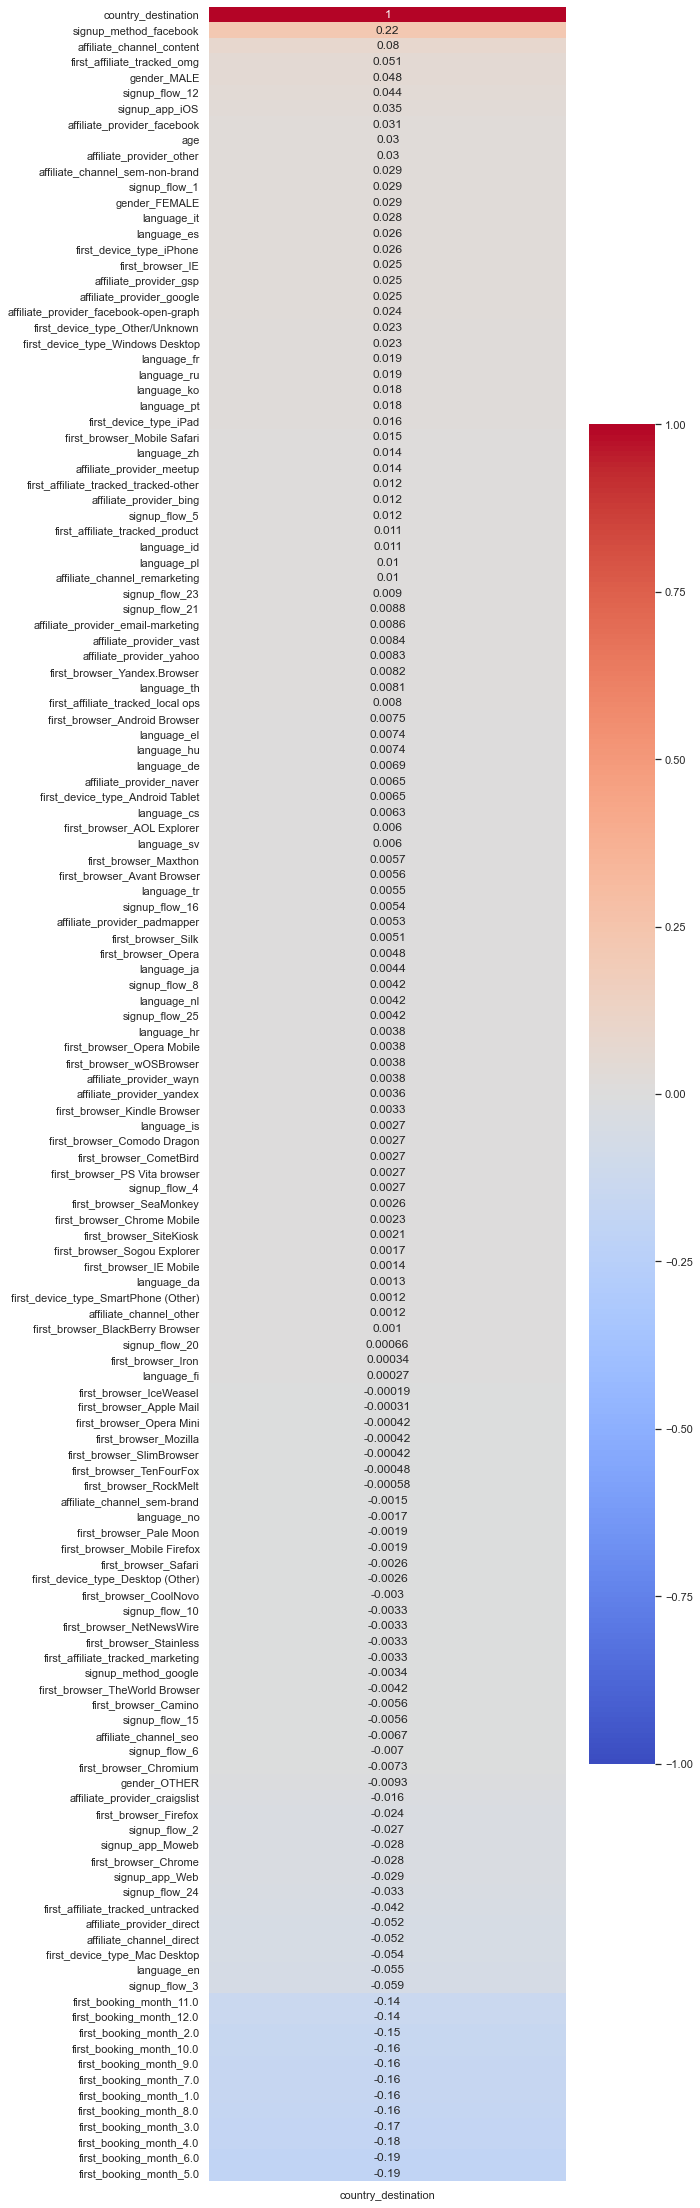

In [53]:
# heatmap showing correlation to the target variable
sns.set(rc={'figure.figsize': (8, 40)})
sns.heatmap(train.corr()[['country_destination']].sort_values('country_destination', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1);

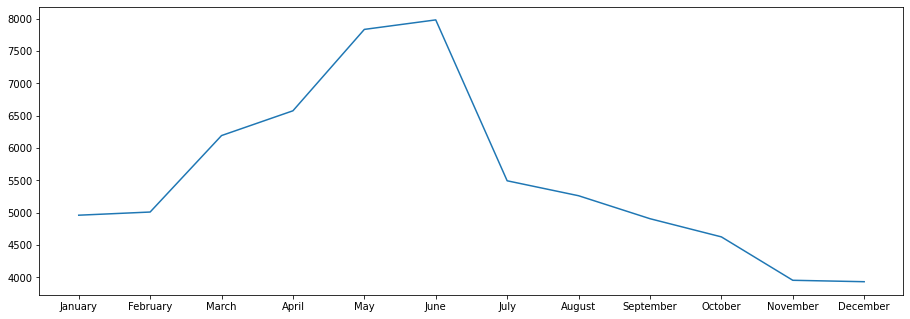

In [49]:
month_sums = [train['first_booking_month_1.0'].sum(),
              train['first_booking_month_2.0'].sum(),
              train['first_booking_month_3.0'].sum(),
              train['first_booking_month_4.0'].sum(),
              train['first_booking_month_5.0'].sum(),
              train['first_booking_month_6.0'].sum(),
              train['first_booking_month_7.0'].sum(),
              train['first_booking_month_8.0'].sum(),
              train['first_booking_month_9.0'].sum(),
              train['first_booking_month_10.0'].sum(),
              train['first_booking_month_11.0'].sum(),
              train['first_booking_month_12.0'].sum()]

months = ['January',
          'February',
          'March',
          'April',
          'May',
          'June',
          'July',
          'August',
          'September',
          'October',
          'November',
          'December']


# chart the # of bookings each month
fig = plt.figure(figsize=(12, 4))
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(months, month_sums);

**Check other variable distributions.**

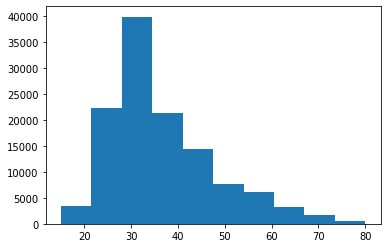

In [41]:
plt.hist(train['age']);

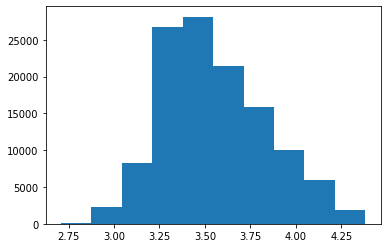

In [50]:
plt.hist(np.log(train['age']));

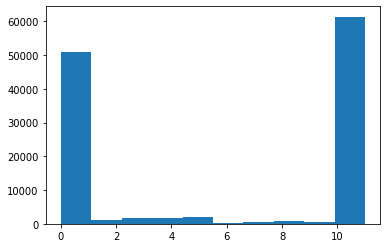

In [52]:
plt.hist(train['country_destination']);

In [45]:
train['country_destination'].value_counts(normalize=True)

10    0.447179
0     0.392067
11    0.061087
1     0.030021
5     0.016324
3     0.014302
4     0.013772
2     0.008676
8     0.006886
7     0.004864
9     0.003530
6     0.001293
Name: country_destination, dtype: float64

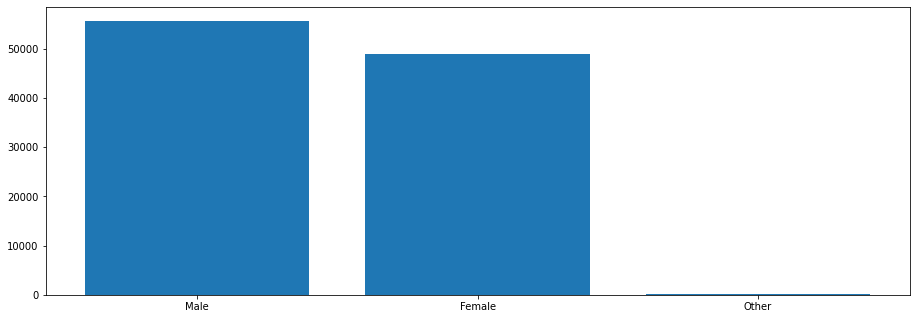

In [48]:
gender_sums = [train['gender_FEMALE'].sum(),
              train['gender_MALE'].sum(),
              train['gender_OTHER'].sum()]

genders = ['Male',
          'Female',
          'Other',
]

fig = plt.figure(figsize=(12, 4))
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(months, month_sums);